# Why Bootstrap Sampling Is the Badass Tool of Probabilistic Thinking
## And how you can use it in practice right now
<img src='images/boot.jpg'></img>

### Setup

In [83]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

sns.set_context('talk')
plt.style.use('ggplot')

### Introduction

You did all your best and managed to measure the speed of sound in your room 50 times using an electronic device. Feeling very proud and excited, you look at your results:

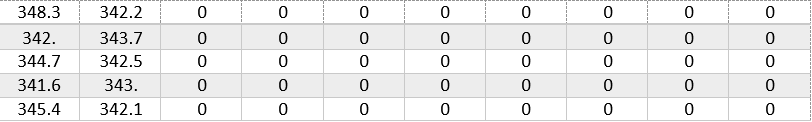

What a big slap in the face! After the first 10 measurements, there was a technical failure with the device and did not measure anything at all. What do you do now? Well, you could take the mean of the available data but how confident would you be? If the device worked correctly, the mean you compute could easily be some other number. 

In fact, the whole reason of measuring the speed 50 times was that you could be *confident* with your findings and make valid assumptions about the speed of sound in any environment, not just in your room. 

Do you have to go though all that pain and set up a new device to record more measurements? Heck, no! Well, at least if you know Python and a magical method called **Bootstrapping**. Bootstrapping allows you to simulate any distribution of data which basically means you avoid collecting more data and you get to make pretty sound estimates about a much larger group using only a subset. 

The concept of going from just a small sample to making predictions about the whole group using bootstrapping has vowed people for so many years. If used in practice, it can seem a little bit like cheating but in fact, it is nothing more than a combination of very little math and a whole lot of computing power. 

Even though it is a very simple method, its applications go much beyond the scope of this article. The technique has been used in leading machine learning algorithms such as [Random Forests](https://en.wikipedia.org/wiki/Random_forest#:~:text=Random%20forests%20or%20random%20decision,average%20prediction%20(regression)%20of%20the) and [Stochastic Gradient Boosting](https://en.wikipedia.org/wiki/Gradient_boosting).

In this post, we will look at why the method works and how we can implement it using Python to simulate data distributions which help us make predictions about populations, compute confidence intervals and perform hypothesis tests in the future.

### Terminology Alert

In this post, I will be using the words population, sample, statistic and parameter often. So it is important you understand them before we move on:

- **Population and sample**: in statistics, *population* refers to our whole of interest and *sample* is just a small, random subset of the population. For example, all followers of Towards Data Science publication can be the whole population and the ones who read this post is a tiny sample of that population. For our case, 10 speed measurements of sound in our room can be the sample while the speed measurements of sound in any environment is the population. 
- **Parameter and statistic**: If we calculate a certain metric for the population for example mean or standard deviation, it is called population *parameter*. If we do this for a sample, it will be called sample statistic. 

As a final example, let's say you have 10k email subscribers. You send out a blast email to all of your subscribers asking about their favorite programming language. Only 2500 people respond and 70% of them like Python. Here:
- **Population**: 10k email subscribers
- **Sample**: 2500 people who responded
- **Statistic**: 70% liking Python
- **Parameter**: Unknown, we should calculate the percentage of all subscribers who like Python using only the sample.

Now that we agreed on terminology, let's move on to bootstrapping.

### Bootstrapping Theory

To show bootstrapping in practice, we will start working with the ten measurements of the speed of sound. First, let's plot the data points:

In [24]:
zeros = np.array([1,1,1,1,1,1,1,1,1,1])
speed = np.random.uniform(340, 350, size=10).round(2)

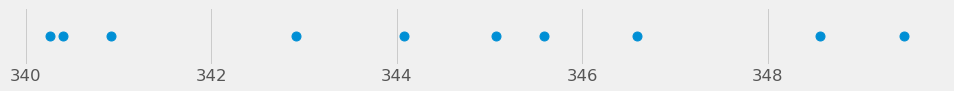

In [42]:
# Create fig, ax objects
fig, ax = plt.subplots(figsize=(15, 1))
# Plot the data points
ax.plot(speed, zeros, 'o')
# Remove the y ticks
ax.set_yticks([])

plt.show();

Our aim is to correctly estimate the speed of sound in any open environment, not just in a room. Since it is unlikely we see outliers with the speed of sound, mean can be a good metric to represent the speeds. So, let's annotate the mean on the plot:

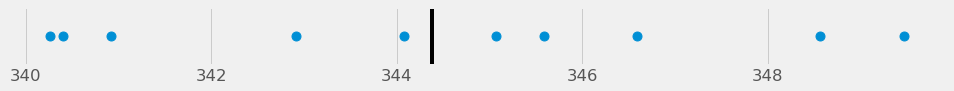

In [43]:
# Create fig, ax objects
fig, ax = plt.subplots(figsize=(15, 1))
# Plot the data points
ax.plot(speed, zeros, 'o')
# Remove the y ticks
ax.set_yticks([])
# Plot the mean
ax.axvline(np.mean(speed), c='black')

plt.show();

We get a mean of 344.39 m/s (meters per second). Now, we bootstrap the sample:

1) First, we randomly select 10 measurements from the speeds and duplicates are allowed.

2) Calculate the mean of this random sample and store it in an array.

3) Repeat the steps one and two many, many times, optimally 1000 or 10000 times.

So, let's choose 10 points from the available data randomly and we can choose any data point as many times as we want:

344.396


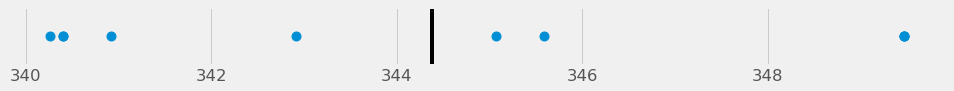

In [47]:
temp = np.random.choice(speed, size=10)
print(temp.mean())
# Create fig, ax objects
fig, ax = plt.subplots(figsize=(15, 1))
# Plot the data points
ax.plot(temp, zeros, 'o')
# Remove the y ticks
ax.set_yticks([])
# Plot the mean
ax.axvline(np.mean(speed), c='black')

plt.show();

I used Python to randomly choose the points (which I will show how later). As you see, we only have 7 unique points which means there are 3 points which are plotted on top of each other because we ended up with some duplicates. Then, we measured the mean and plotted it and this time it is 344.396. 

Here are the ten random points sampled from the original 10 measurements:

In [49]:
list(temp)

[345.59, 345.07, 340.4, 349.47, 340.92, 349.47, 340.26, 349.47, 342.91, 340.4]

Above is called a single bootstrap sample. Its mean, which is 344.396, is called the bootstrap replicate or metric. Next, we should repeat these first two steps thousands of times. For example, below I will take 1000 bootstrap samples and only plot their means on a single graph:

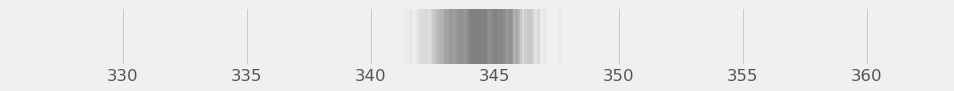

In [64]:
fig, ax = plt.subplots(figsize=(15, 1))
for _ in range(1000):
    # Take a sample
    sample = np.random.choice(speed, size=10)
    # Plot the mean as a vertical line
    ax.axvline(sample.mean(), color='grey', alpha=0.03)

# Remove the y ticks
ax.set_yticks([])

plt.show();

Above is a graph of 1000 bootstrap replicates (means) sampled from the original 10 sound measurements. I plotted the lines with lower transparency so that overlapping lines create a denser background around the actual estimated mean. As you see, the sample mean is around 344 m/s which we can confidently use as a general average of the speed of sound in any environment.

What we just did is called *bootstrap sampling* with *replacement*. *With replacement* means selecting a random data point from the underlying sample and put it back so that all the data points have an equal chance of being chosen once again. Also, it is important that each bootstrap sample has the same length as the underlying sample. In our case, each bootstrap sample has the length of ten because we only had 10 measurements of speed to begin with.

Now, the question is 'Why do we have to assume the mean we calculated with bootstrap sampling is close to the actual population parameter?'. In the next section, we will answer this question based on some math.

### Why Bootstrapping Works

In probability, there is a theory called Law of Large Numbers. It dictates that if the same experiment is performed a large number of times, the average result of the experiments tends to come closer to the real estimate as the number of experiments increase. 

For example, rolling a fair die will have one of the six outcomes 1, 2, 3, 4, 5, 6. Your expected score would be the average of these 6 numbers which is 3.5. Of course, in reality you won't have an average score of 3.5 if you rolled the die a few times. However, because of the law of large numbers, as you increase the number of rolls, your average score comes closer and closer to 3.5.

If you think about this for a moment, it actually makes sense. Taking a more real-world example, if you took an SAT test you might get two very different results. However, taking the exam more and more will get you closer and closer to your actual skill measure on the test. 

Bootstrapping uses this same idea under the hood. Given a good sample (and I will explain what a good sample is in the next section), taking random bootstrap samples from this sample will actually give results that are pretty close to the actual population parameters.

To me, using just a tiny amount of data many times to make predictions for a large group without having to collect more data is pretty amazing.

### How Effective Is Bootstrapping

An obvious question is how effective the method is. The answer is that most of the times, you can expect the results of bootstrapping to be correct and usable. However, the accuracy of deriving inferences about population parameters depends on the sample you collected. 

For bootstrapping to work correctly, the sample you use should accurately represent the population of interest. For example, if you want to collect information about heights of people and calculate the average height of all humans on the planet, you have to choose a correct sample. Since data collection is expensive and time-consuming, the collected data should be really random and include data points from a wide range of groups within the population. To calculate the average height, the sample you collected only from a single group like athletes will not represent the heights of all people well since they tend to be taller.

If you are sure you are working with a well enough sample, you can almost always be certain that the results obtained from bootstrapping is reliable. If not, you have to take a leap of faith and use bootstrapping anyway since your given data will be secondary (collected by others) most of the time.

As an added benefit, bootstrapping can be used to measure a whole range of other parameters of the population. Good examples are median, mode, standard deviation, variance, correlations, and many others. 

### What is a Sampling Distribution

The terms 'bootstrapping' and 'sampling distributions' often come together and indeed, sampling distributions are obtained using bootstrapping. Let's clarify this using the earlier speed of sound measurements. 

Recall that we took 1000 bootstrap samples the original 10 measurements and plotted the mean of each bootstrap sample. This time, instead of plotting, I will store all the means in a Python array:

In [70]:
means = list()
for _ in range(1000):
    means.append(np.random.choice(speed, size=len(speed)).mean().round(2))

In [74]:
means = np.array(means)

In [75]:
means[:20]

array([344.38, 345.02, 345.05, 343.44, 342.81, 345.12, 346.42, 344.56,
       344.82, 344.46, 344.76, 344.08, 344.58, 344.65, 343.74, 344.25,
       345.05, 344.15, 343.38, 345.32])

I am displaying the first 20 means out of 1000 which are stored in the variable `means`. In probability, `means` is called a *sampling distribution of the sample mean*. If instead we calculated standard deviation of each bootstrap sample:

In [76]:
stds = list()
for _ in range(1000):
    stds.append(np.random.choice(speed, size=len(speed)).std().round(2))

In [77]:
stds = np.array(stds)

In [78]:
stds[:20]

array([3.38, 3.19, 2.14, 3.2 , 2.97, 2.76, 2.9 , 2.75, 3.17, 3.01, 3.48,
       3.77, 2.4 , 3.2 , 3.6 , 2.89, 2.64, 1.95, 3.09, 2.48])

it would be called 'a sampling distribution of the sample standard deviation'. 

This distribution is practically useless unless we plot it. A common plot for sampling distributions is a histogram:

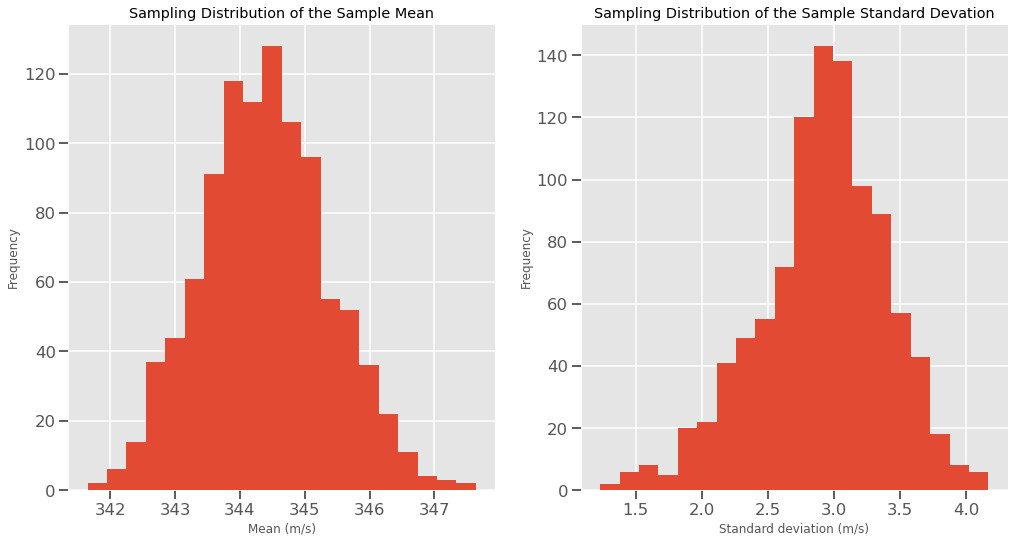

In [85]:
# Create fig, ax objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Plot the means
ax1.hist(means, bins=20)
ax1.set(title='Sampling Distribution of the Sample Mean',
        xlabel='Mean (m/s)',
        ylabel='Frequency')
# Plot the stds
ax2.hist(stds, bins=20)
ax2.set(title='Sampling Distribution of the Sample Standard Devation',
        xlabel='Standard deviation (m/s)',
        ylabel='Frequency')

plt.show();

We can see that the sampling distributions are approximately normally distributed. In fact, every single sampling distribution obtained under right bootstrapping conditions will follow a nearly perfect normal distribution as the number of bootstrap samples increases.

Finally, in the next section we will take a peek the code which generated all these bootstraps and sampling distributions.